# Exploratory Data Analysis 
### Dr. Martin Luther King's (1963) "I Have a Dream" speech
> For more info on this speech, see https://en.wikipedia.org/wiki/I_Have_a_Dream

**Week01, Section 04**

ISM6564 Fall 2023

&copy; 2023 Dr. Tim Smith

-----

In this tutorial, we will learn how to conduct redumentary text analysis on THE famous "I have a dream" speech by Martin Luther King Jr.

We will explore the following:

- Introduce and Review important Concepts
  - Corpus, a collection of documents (in the example below, a single document)
  - Tokenization, the process of breaking up a document into individual words
  - Lemizaton, the process of reducing words to their root form
  - Stopwords, words that are not useful for analysis
  - n-Grams, a sequence of n words
  - Wordcloud, a visualization of the most common words in a corpus
  - Sentiment Analysis, the process of determining the sentiment of a document (positive, negative, neutral)
- How to conduct exploratory textual data analysis
  - Load text
  - Tokenize
  - Filter 
    - remove stopwords
    - remove certain patterns (i.e. non-alphabetic characters)
  - Lemmatize Words
    - Not always necessary - depends on goals
  - Analysis
    - Word Frequencies
      - calculate word frequencies
      - chart word frequencies
    - Wordcloud
      - generate wordcloud from word frequencies
      - generate wordcloud from text
        - n-grams
      - adjust wordcloud appearance
        - masking (shape)
    - Sentiment
      - positive, neutral, negative and composite
      - chart sentiment

**To run the next cell, you will need to have pandas, numpy, matplotlib, nltk, and wordcloud installed. You can use the following commands to install them if needed:**

If you are using Conda, you can use the following shell commands to install the packages:

```
conda install -c conda-forge pandas    
conda install -c conda-forge numpy
conda install -c conda-forge matplotlib
conda install -c conda-forge nltk
conda install -c conda-forge wordcloud
```

If you are not running a Conda environment, you can the following shell commands to install the packages:

```
pip install pandas
pip install numpy
pip install matplotlib
pip install nltk
pip install wordcloud
```


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
#import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.util import ngrams

from wordcloud import WordCloud
from PIL import Image # used for opening image for masking wordcloud # you need to install Pillow package

import nltk
nltk.download('punkt') # sentance tokenizer
nltk.download('stopwords')
nltk.download('wordnet') # WordNet is a lexical database for the English language - used to find the lemma of a word

nltk.download('vader_lexicon') # Valence Aware Dictionary and sEntiment Reasoner
from nltk.sentiment.vader import SentimentIntensityAnalyzer



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rmura\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rmura\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rmura\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\rmura\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Clean/preprocess text

In [2]:
# read in the data using iso-8859-1 encoding
with open('data/MLK.txt', 'r', encoding='iso-8859-1') as file:
    text = file.read()

# tokenize the text
# nltk.download('punkt') # uncomment if you need to download the punkt package
tokens = nltk.word_tokenize(text)

# remove all tokens that are not alphabetic
tokens = [word for word in tokens if word.isalpha()]

# make lowercase
tokens = [word.lower() for word in tokens]

# remove all tokens that are only one character
tokens = [word for word in tokens if len(word) > 1]

# remove stopwords
stop_words = stopwords.words('english')
tokens = [word for word in tokens if word not in stop_words]

# lemmatize words(Lemmatization is a text normalization technique - it is a process of converting words to their base forms)
# nltk.download('wordnet') # uncomment if you need to download the wordnet package
lemmatizer = WordNetLemmatizer()
tokens = [lemmatizer.lemmatize(word) for word in tokens]

# print the first 10 words
print(tokens[:10])

['happy', 'join', 'today', 'go', 'history', 'greatest', 'demonstration', 'freedom', 'history', 'nation']


### Data Visualizations

(20, 15, 13, 13, 12, 11, 11, 11, 10, 10, 9, 9, 9, 8, 8, 8, 8, 7, 7, 6)
('freedom', 'negro', 'one', 'let', 'ring', 'nation', 'dream', 'day', 'every', 'come', 'today', 'go', 'back', 'satisfied', 'must', 'justice', 'able', 'white', 'together', 'men')


Text(0.5, 1.0, 'Barplot of Top 20 Most Frequent Words')

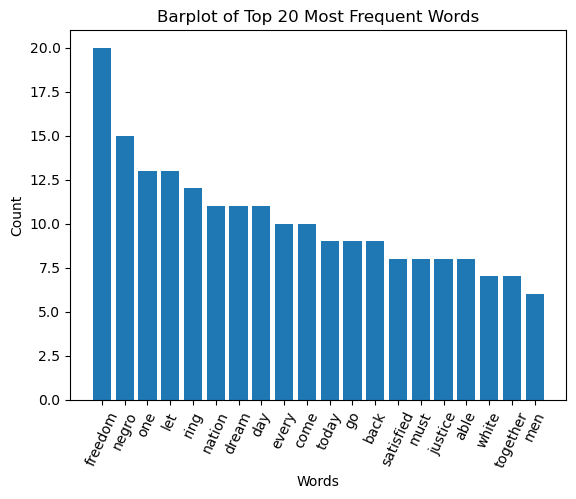

In [3]:
# We want to draw a barplot of the most frequent words in this speech
# to do this, we must create a dictionary with word counts for each word, and sort the dictionary by word counts
token_freq = {}                              # creat an empty dictionary
for token in tokens:                         # for each word in the list of words
    token_freq[token] = token_freq.get(token, 0) + 1  # add 1 to the count value for the key word in the dictionary (rememeber, a dictionary is a key-value pair)

# in the above code, we use get(). It returns the value of a key (word) in a dictionary if it exists. If it doesn't exist
# it returns the value of the second arguement (0 in this case). This is a compact way of counting the frequency of words.

# Since dictionaries are unordered, to sort the word counts from high 
# to low, we must convert the dictionary into a list (of tuples)
word_freq = []                      # create an empty list
for key, value in token_freq.items():     # iterate through the key value pairs in the dictionary
    word_freq.append((value, key))  # append a tuple of (value, key) to word_freq list.
# items() returns a list of tuples with key-value pairs in a dictionary
# Keys and values are reversed in list word_freq for ease of sorting 

# Sort word_freq list from high to low
word_freq.sort(reverse=True)

top20_words = word_freq[0:20]   # slice the first 20 words

# Convert the list of tuples to two tuples for plotting using zip()
values, labels = zip(*top20_words) # unzip the list of tuples into two tuples
print(values)
print(labels)

# Barplot of most frequent words
import matplotlib.pyplot as plt
plt.bar(labels, values)
plt.xlabel('Words')
plt.xticks(rotation=65)
plt.ylabel('Count')
plt.title('Barplot of Top 20 Most Frequent Words')

### Wordcloud
Install the wordcloud library from Anaconda command prompt (Note: The "python -m" option ensures compatibility with current Python kernel).

python -m pip install wordcloud

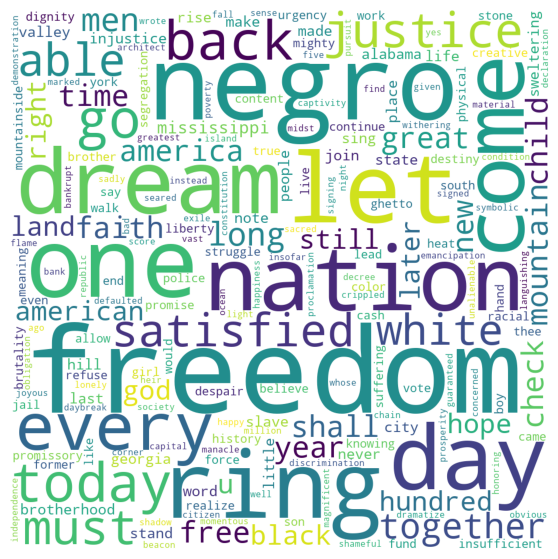

In [4]:
# Create a wordcloud from the token_freq dictionary
wordcloud = WordCloud(
    width=1000, 
    height=1000, 
    background_color='white', 
    collocations='FALSE', 
    min_font_size=16
)
# note: if you get an error stating "ValueError: Only supported for TrueType fonts", then 
# run the following two commands at your shell prompt:
# pip install --upgrade pip
# pip install --upgrade Pillow

wordcloud.generate_from_frequencies(token_freq)
plt.figure(figsize = (7,7))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

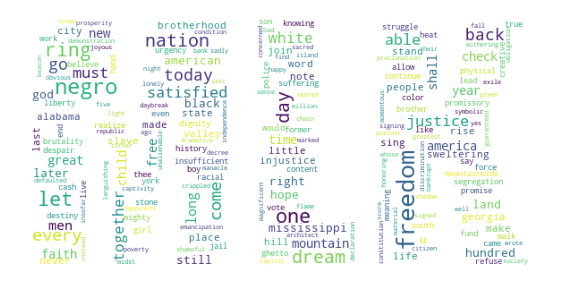

In [5]:
# create a wordcloud, but in the shape of MLK

mask=np.array(Image.open('images/mlk-text.png'))
mask=np.where(mask > 3, 255, 0)
 
wordcloud = WordCloud(
    width = mask.shape[0],
    height = mask.shape[1], 
    background_color='white', 
    collocations='FALSE', 
    mask = mask
    )
wordcloud.generate_from_frequencies(token_freq)
plt.figure(figsize = (7,7))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

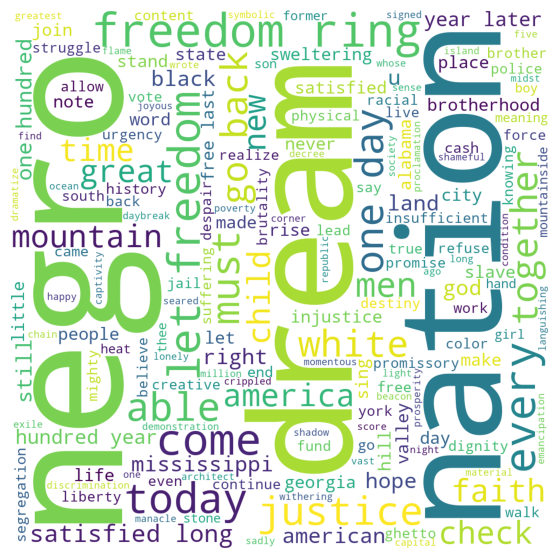

In [6]:
from wordcloud import WordCloud

text_corpus = ' '.join(tokens)
wordcloud = WordCloud(
    width=1000, 
    height=1000, 
    background_color='white', 
    collocations='FALSE', 
    min_font_size=16
)

wordcloud.generate_from_text(text_corpus)
plt.figure(figsize = (7,7))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Side trek on n-grams

n-grams are a contiguous sequence of n items from a given sample of text or speech. The items can be phonemes, syllables, letters, words or base pairs according to the application. The n-grams typically are collected from a text or speech corpus. When the items are words, n-grams may also be called shingles. An n-gram of size 1 is referred to as a "unigram"; size 2 is a "bigram" (or, less commonly, a "digram"); size 3 is a "trigram". Larger sizes are sometimes referred to by the value of n, e.g., "four-gram", "five-gram", and so on.

[('happy', 'join'), ('join', 'today'), ('today', 'go'), ('go', 'history'), ('history', 'greatest'), ('greatest', 'demonstration'), ('demonstration', 'freedom'), ('freedom', 'history'), ('history', 'nation'), ('nation', 'five')]


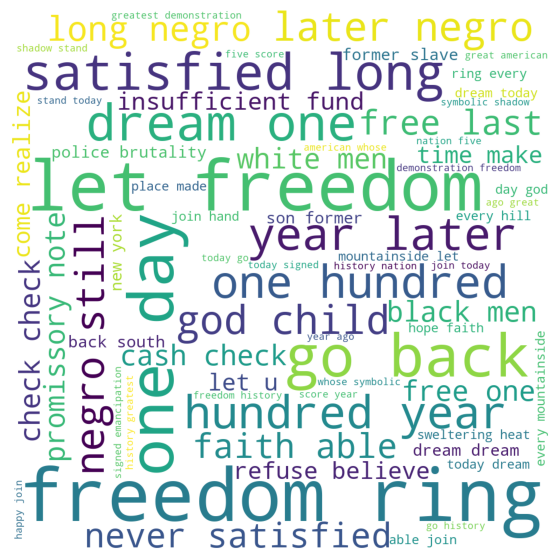

In [7]:
# Create n-grams using NLTK
# n-grams is a way of preserving sequence (and help with meaning) of words

bigrams = list(ngrams(tokens, 2))    # create a list of bigrams (note that the output is a list of tuples)

print(bigrams[:10]) # print the first 10 bigrams
# create a dictionary of bigrams and their counts
bigram_dict = {}
for bigram in bigrams:              # iterate through the list of bigrams
    bigram_str = ' '.join(bigram)   # convert the bigram tuple to string
    bigram_dict[bigram_str] = bigram_dict.get(bigram_str, 0) + 1 # add bigram to dictionary if not exist and set value to 1, otherwise increment existing bigram count by 1
    
# create a word cloud of bigrams
from wordcloud import WordCloud
wordcloud = WordCloud(
    width=1000, 
    height=1000, 
    background_color='white', 
    collocations='FALSE', 
    min_font_size=16)

wordcloud.generate_from_frequencies(bigram_dict)
plt.figure(figsize = (7,7))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

[('happy', 'join', 'today'), ('join', 'today', 'go'), ('today', 'go', 'history'), ('go', 'history', 'greatest'), ('history', 'greatest', 'demonstration'), ('greatest', 'demonstration', 'freedom'), ('demonstration', 'freedom', 'history'), ('freedom', 'history', 'nation'), ('history', 'nation', 'five'), ('nation', 'five', 'score')]


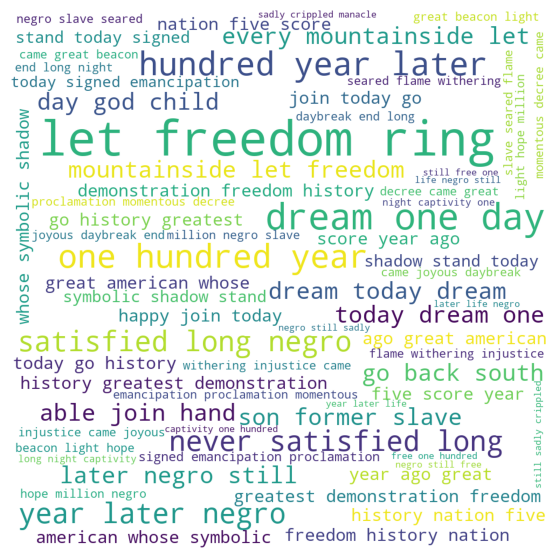

In [8]:
bigrams = list(ngrams(tokens, 3))    # create a list of bigrams (note that the output is a list of tuples)

print(bigrams[:10]) # print the first 10 bigrams
# create a dictionary of bigrams and their counts
bigram_dict = {}
for bigram in bigrams:              # iterate through the list of bigrams
    bigram_str = ' '.join(bigram)   # convert the bigram tuple to string
    bigram_dict[bigram_str] = bigram_dict.get(bigram_str, 0) + 1 # add bigram to dictionary if not exist and set value to 1, otherwise increment existing bigram count by 1
    
# create a word cloud of bigrams
from wordcloud import WordCloud
wordcloud = WordCloud(
    width=1000, 
    height=1000, 
    background_color='white', 
    collocations='FALSE', 
    min_font_size=16
)
wordcloud.generate_from_frequencies(bigram_dict)
plt.figure(figsize = (7,7))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Sentiment Analysis

In [9]:
analyzer = SentimentIntensityAnalyzer()

print(analyzer.polarity_scores(text))

# neg: Negative
# neu: Neutral
# pos: Positive
# compound: Compound (i.e. aggregated score)
# Compound value is between -1 (most extreme negative sentiment) and +1 (most extreme positive sentiment)

{'neg': 0.098, 'neu': 0.704, 'pos': 0.198, 'compound': 0.9997}


In [10]:
print(analyzer.polarity_scores(text))

{'neg': 0.098, 'neu': 0.704, 'pos': 0.198, 'compound': 0.9997}


In [11]:
for w in tokens[:20]:
    print(w, analyzer.polarity_scores(w))

happy {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5719}
join {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.296}
today {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
go {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
history {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
greatest {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.6369}
demonstration {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.1027}
freedom {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.6369}
history {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
nation {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
five {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
score {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
year {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
ago {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
great {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.6249}
american {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
whose {'ne

In [12]:
negative_words = 0
positive_words = 0

for w in tokens:
    polarity = analyzer.polarity_scores(w)
    if polarity["neg"] > 0:
        negative_words += 1 
    if polarity["pos"] > 0:
        positive_words += 1

total_words = len(tokens)
neutral_words = total_words - positive_words - negative_words

print(f"Neutral words: {neutral_words} / {neutral_words/total_words*100:0.2f}%")
print(f"Positive words: {positive_words} / {positive_words/total_words*100:0.2f}%")
print(f"Negative words: {negative_words} / {negative_words/total_words*100:0.2f}%")


Neutral words: 651 / 79.68%
Positive words: 126 / 15.42%
Negative words: 40 / 4.90%


In [13]:
# create a dataframe with tokens column
df = pd.DataFrame({'tokens':tokens})

# add a column with the sentiment score for each token
df['sentiment'] = df['tokens'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# plot the sentiment score for each token with negative sentiment in red and positive sentiment in green
df['color'] = df['sentiment'].apply(lambda x: 'red' if x < 0 else ('blue' if x >0 else 'green'))

df.head()

,tokens,sentiment,color
0,happy,0.5719,blue
1,join,0.2960,blue
2,today,0.0000,green
3,go,0.0000,green
4,history,0.0000,green


Number of positive tokens:  126
Number of negative tokens:  40
Number of neutral tokens:  651


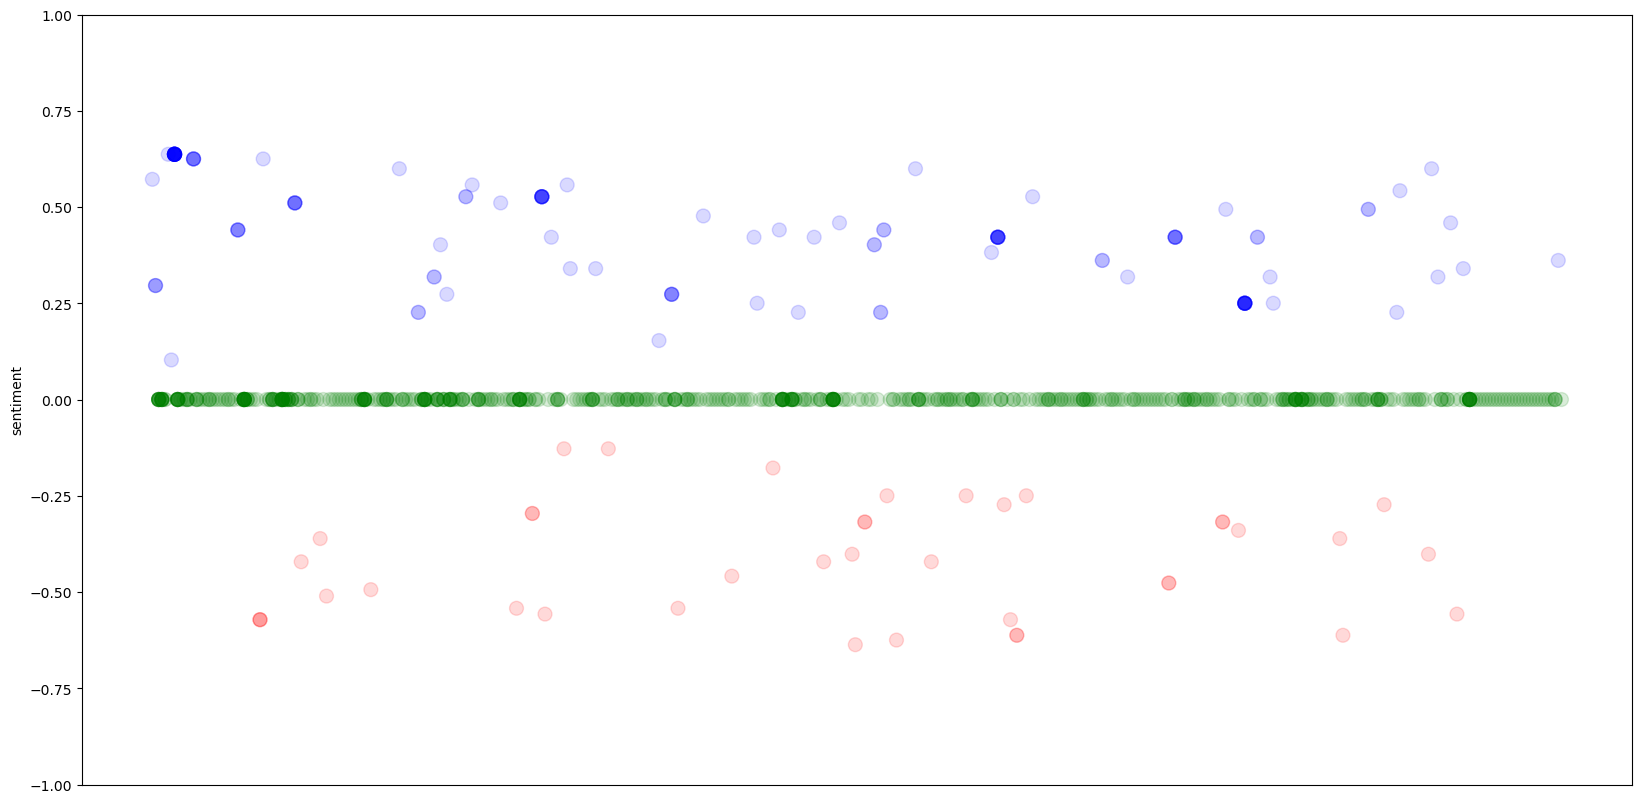

In [14]:
ax = df.plot.scatter(x='tokens',y='sentiment',figsize=(20,10),s=100,c=df['color'], alpha=0.15)

ax.set_ylim(-1,1)
ax.xaxis.set_tick_params(bottom=False, labelbottom=False)

# set the x-axis label
plt.xlabel('',fontsize=20)

num_of_positve_tokens = len(df[df['sentiment'] > 0])
num_of_negative_tokens = len(df[df['sentiment'] < 0])
num_of_neutral_tokens = len(df[df['sentiment'] == 0])

print("Number of positive tokens: ", num_of_positve_tokens)
print("Number of negative tokens: ", num_of_negative_tokens)
print("Number of neutral tokens: ", num_of_neutral_tokens)

### Insights

**So what have we learned from the above analysis of Dr. MLK's "I Have a Dream" speech?**

## Questions:

1. What is tokenization?
2. What is lemmatization?
3. What is sentiment analysis?
4. What is vader?
5. What is an n-gram?
6. What is a word cloud?
7. What are stop words?
8. What is a corpus?
9. What is compound sentiment?